# Метод Рунге-Кутта

Метод Рунге-Кутта для численного решения задачи Коши на отрезке $[x_0, x_0 + l]$:<br><br> $$u'(x) = f(x, u(x))$$ $$u(x_0) = u_o$$
<br>Сначала реализуем метод Рунге-Кутта второго порядка точности. Результатом работы алгоритма будет являться сеточная функция $y(x_i)$, определенная на сетке $x_i = x_0 + ih$, где $i \in \{0, ..., n\}$, а $h$ - фиксированный шаг. В нашем случае сетка равномерная и равна $h = \frac{l}{n}$, где $n$ - число шагов, которое подается на вход алгоритму.<br><br>
Метод Рунге-Кутта второго порядка точности предоставляет нам рекуррентные формулы для вычисления значения сеточной функции $y_i$: $$y_{i+1} = y_i + \left[(1-\alpha)f(x_i, y_i) + \alpha f(x_i + \frac{h}{2\alpha}), y_i + \frac{h}{2\alpha} f(x_i, y_i))\right]h$$<br>
В приведенном ниже решении $\alpha = \frac{1}{2}$. В этом случае формулы принимают вид: $$y_{i+1} = y_i + \frac{h}{2} \left[f(x_i, y_i) + f(x_i + h, y_i + hf(x_i, y_i))\right]$$<br>

In [2]:
# Подключаем нужные библиотеки
import numpy as np
import math
import matplotlib as plt
%matplotlib inline

Метод принимает на вход начальные условия задачи Коши $x_0, u_0$, функцию $f(x, u)$, длину отрезка $l$ и число шагов $n$.

In [3]:
def Runge_Kutta_method(x_0, y_0, f, l, n):
    h = l / n # шаг сетки
    grid = dict() # используем структуру данных "словарь" (ассоциативный массив) для хранения сетки
    grid[x_0] = y_0 # начальное условие
    for i in range(0, n): # заполняем оставшиеся n значений по рекуррентной формуле
        x_i = x_0 + h*i
        y_i = grid[x_i]
        t = f(x_i, y_i) # промежуточное вычисление
        grid[x_0 + h*(i + 1)] = y_i + (h / 2) * (t + f(x_i + h, y_i + h*t))
    return grid

Проверим работу реализованного метода на задаче Коши, данной в условии:$$f(x, y) = 3 - y - x$$ $$y(0) = 0$$<br>Точным (аналитическим) решением данной задачи является функция $y(x) = 4 - x - 4e^{-x}$.

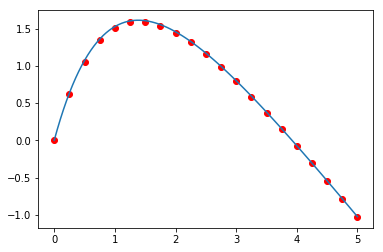

In [4]:
def func(x, y):
    return 3 - y - x

res = Runge_Kutta_method(0, 0, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 4 - true_solution - 4 * np.exp(-true_solution)) # график аналитического решения

Как видим, найденная сеточная функция достаточно хорошо приближает аналитическое решение на отрезке $[0, 5]$.

Проверим работу метода на некоторых других тестах. 

**Задача Коши 1**: $$y'(x) = y(x)$$ $$y(0) = 1$$Очевидно, что её решением является функция $y(x) = e^x$. Проверим это.

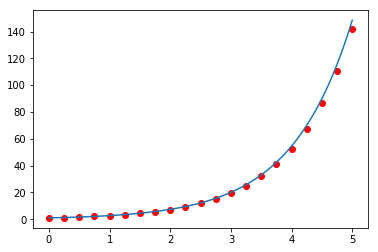

In [7]:
def func(x, y):
    return y

res = Runge_Kutta_method(0, 1, func, 5, 20)
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(0, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.exp(true_solution)) # график аналитического решения

**Задача Коши 2**: $$y'(x) = x^3+x+3\frac{y}{x}$$ $$y(1)=3$$При $x \geqslant 0$ её решением является функция $y(x) = x^4 - x^2 + 2x^3$. Проверим это. Увеличим число шагов $n$ до 50, чтобы повысить точность.

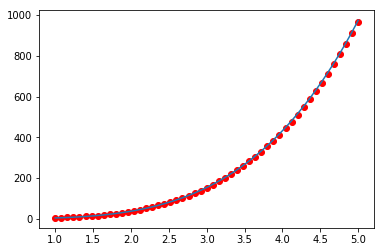

In [29]:
def func(x, y):
    return x * x * x + x + 3 * y / x

res = Runge_Kutta_method(1, 3, func, 4,  50) 
solution = np.array(list(res.items(ну в по))) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, np.power(true_solution, 4) - np.power(true_solution, 2) + 3 * np.power(true_solution, 3))
# график аналитического решения

**Задача Коши 3**: $$y'(x) = -\frac{y}{x}$$ $$y(1)=1$$Аналитическим решением является функция $y=\frac{1}{x}$. Проверим работу алгоритма.

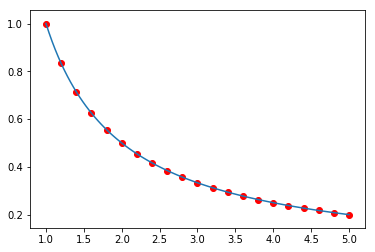

In [33]:
def func(x, y):
    return - y / x

res = Runge_Kutta_method(1, 1, func, 4,  20) 
solution = np.array(list(res.items())) # превращаем словарь в массив пар (x, y)
plt.pyplot.scatter(x = solution[:, 0], y = solution[:, 1], c = 'red') # строим график нашей сеточной функции

true_solution = np.linspace(1, 5, 100) # мелкая сетка для вывода аналитического решения
plt.pyplot.plot(true_solution, 1 / true_solution) # график аналитического решения